VALIDACION CRUZADA 
En scikit-learn, el parámetro scoring en la función cross_val_score y otras funciones similares puede tomar una variedad de valores según el tipo de problema que estés abordando. Aquí hay algunos valores comunes que se pueden usar:

Problemas de Regresión:
'explained_variance': Varianza explicada.
'neg_mean_absolute_error': Error absoluto medio negativo.
'neg_mean_squared_error': Error cuadrático medio negativo.
'neg_root_mean_squared_error': Raíz del error cuadrático medio negativo.
'neg_mean_squared_log_error': Error cuadrático medio logarítmico negativo.
'neg_median_absolute_error': Error absoluto mediano negativo.
'r2': Coeficiente de determinación R^2.
Problemas de Clasificación:
'accuracy': Precisión.
'balanced_accuracy': Precisión balanceada.
'f1': Puntuación F1.
'f1_micro': Puntuación F1 (micro-averaged).
'f1_macro': Puntuación F1 (macro-averaged).
'f1_weighted': Puntuación F1 (ponderado).
'roc_auc': Área bajo la curva ROC.
'average_precision': Precisión promedio.
'precision': Precisión.
'recall': Recall.
'jaccard': Coeficiente de Jaccard.
Problemas de Clustering:
'adjusted_rand_score': Índice de Rand ajustado.
'adjusted_mutual_info_score': Información mutua ajustada.
Personalizado:
También puedes pasar tu propia función de puntuación si ninguna de las métricas predeterminadas satisface tus necesidades.

Estos son solo algunos ejemplos comunes, pero hay muchas más métricas disponibles en la biblioteca scikit-learn. La elección de la métrica de puntuación depende del problema específico que estés abordando y de lo que estés tratando de optimizar. Es importante seleccionar una métrica que sea relevante para la tarea y que refleje tus objetivos comerciales o de investigación.

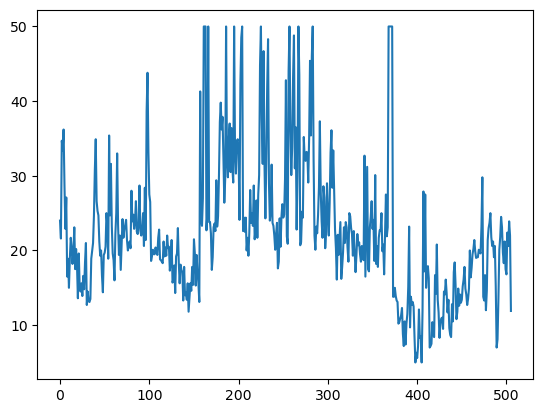

In [9]:

#Aquí tienes un ejemplo básico de cómo entrenar y utilizar un modelo XGBoost en Python utilizando la biblioteca xgboost y el conjunto de datos Iris:

import pandas as pd
import numpy as np
import xgboost as xgb
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from xgboost import XGBRegressor

dataset=pd.read_csv('F:/CAPACITACION/MODELO MLEARNING/recursos/BostonHousing.csv')

X=dataset.iloc[:,:-1] ## independent features
y=dataset.iloc[:,-1] ## dependent features

plt.plot(y)


Ridge Regression

In [14]:

from sklearn.model_selection import GridSearchCV


param_grid = {
    'max_depth'       : [3, 6, 9],
    'learning_rate   ': [0.01, 0.1, 0.2],
    'n_estimators'    : [100, 200, 300],
    'subsample'       : [0.8, 0.9],
    'colsample_bytree': [0.8, 0.9]
}

# Crear un objeto DMatrix, que es una estructura de datos optimizada para XGBoost

xgboost = XGBRegressor()

xgboost_regressor = GridSearchCV(xgboost,param_grid=param_grid,scoring='neg_mean_squared_error',cv=5)

xgboost_regressor.fit(X,y)

# convertir tl resultado de cv en un df
resultados = pd.DataFrame(xgboost_regressor.cv_results_)#
resultados[['params','mean_test_score', 'rank_test_score']].sort_values('rank_test_score')

resultados.sort_values( 'rank_test_score')
#resultados
#ridge_regressor.cv_results_

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_colsample_bytree,param_learning_rate,param_max_depth,param_n_estimators,param_subsample,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
75,0.139031,0.002187,0.006904,0.000195,0.9,0.1,3,200,0.9,"{'colsample_bytree': 0.9, 'learning_rate': 0.1...",-6.384129,-15.147611,-19.646011,-39.625265,-11.654469,-18.491497,11.423519,1
77,0.203647,0.002799,0.006800,0.000400,0.9,0.1,3,300,0.9,"{'colsample_bytree': 0.9, 'learning_rate': 0.1...",-6.366931,-15.488637,-19.341016,-40.241080,-11.500309,-18.587595,11.650054,2
73,0.077910,0.001170,0.006504,0.000446,0.9,0.1,3,100,0.9,"{'colsample_bytree': 0.9, 'learning_rate': 0.1...",-6.604943,-14.356759,-21.377760,-39.629142,-11.836241,-18.760969,11.466875,3
72,0.078727,0.001467,0.006600,0.000490,0.9,0.1,3,100,0.8,"{'colsample_bytree': 0.9, 'learning_rate': 0.1...",-6.952906,-18.032005,-17.775043,-39.012892,-12.949046,-18.944378,10.813736,4
76,0.208318,0.003748,0.006801,0.000401,0.9,0.1,3,300,0.8,"{'colsample_bytree': 0.9, 'learning_rate': 0.1...",-6.686463,-19.398400,-17.070374,-38.694392,-13.192966,-19.008519,10.743330,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
60,0.164017,0.005108,0.007001,0.000002,0.9,0.01,6,100,0.8,"{'colsample_bytree': 0.9, 'learning_rate': 0.0...",-13.082061,-39.489927,-55.596559,-55.728901,-30.428107,-38.865111,16.128657,104
12,0.269605,0.011315,0.007002,0.000632,0.8,0.01,9,100,0.8,"{'colsample_bytree': 0.8, 'learning_rate': 0.0...",-13.312363,-38.714124,-54.994569,-54.011117,-33.701111,-38.946657,15.291568,105
66,0.279340,0.008390,0.007219,0.000687,0.9,0.01,9,100,0.8,"{'colsample_bytree': 0.9, 'learning_rate': 0.0...",-13.214662,-40.095832,-55.320436,-55.225991,-31.509878,-39.073360,15.822762,106
67,0.287957,0.010264,0.007201,0.000400,0.9,0.01,9,100,0.9,"{'colsample_bytree': 0.9, 'learning_rate': 0.0...",-13.625246,-44.098436,-51.939636,-54.505923,-31.833984,-39.200645,15.025914,107


In [17]:
print(xgboost_regressor.best_params_)
print(xgboost_regressor.best_score_)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)
prediction_xgboost=xgboost_regressor.predict(X_test)

{'colsample_bytree': 0.9, 'learning_rate': 0.1, 'max_depth': 3, 'n_estimators': 200, 'subsample': 0.9}
-18.49149691903104


C:\Users\victo\AppData\Local\Temp\ipykernel_27556\1531991646.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(y_test-prediction_xgboost)
D:\Programas\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: xlabel='medv', ylabel='Density'>

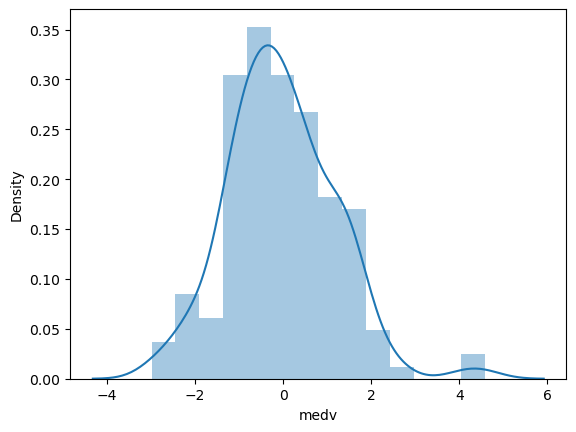

In [18]:
import seaborn as sns

sns.distplot(y_test-prediction_xgboost)

# XGBOOST